# Dice Game Monte Carlo 

In [74]:
# Imports 

import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics 
import collections 

In [30]:
def roll_dice():
    return (random.randint(1,6))

score = 0 
rolls = 0 
dub_counter = 0
roll = 0

dice_one = 0
dice_two = 0

#### Expected Value of a Dice Throw 

In [122]:
# Dice throw function
def dice_throw():
    dice_one = roll_dice()
    dice_two = roll_dice()
    
    score = dice_one + dice_two 
    
    # Dice rules 
    if (dice_one == 1) or (dice_two == 1):
        score = 0 
    elif  (dice_one == dice_two):
        score = score * 2 
    return(score)

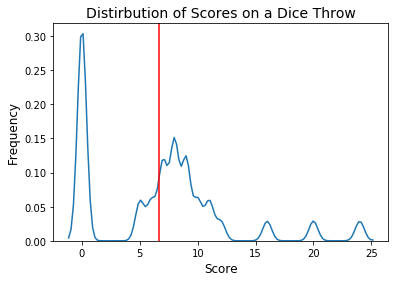

In [130]:
games = []

# Simulate 1,000,000 tosses
for i in range(1000000):
    games.append(dice_throw())

# Plot
sns.kdeplot(games)
plt.axvline(x = statistics.mean(games), color = 'red')
plt.title('Distirbution of Scores on a Dice Throw', fontsize = 14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [124]:
# Get counts of each score
ctr = collections.Counter(games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(12))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
1,0,306428,0.306428
0,8,139352,0.139352
2,7,110837,0.110837
4,9,110726,0.110726
5,10,55944,0.055944
6,11,55425,0.055425
7,6,55367,0.055367
3,5,55147,0.055147
11,12,27809,0.027809
10,20,27757,0.027757


In [125]:
while score < 100: 
    # roll dice
    dice_one = roll_dice()
    dice_two = roll_dice()
    
    # snake eyes 
    if dice_one == dice_two == 1 



SyntaxError: invalid syntax (<ipython-input-125-dd769fc2d2b0>, line 7)

[6, 0, 11, 7, 8, 5, 16, 24, 10, 9, 12, 20]